# Polynomial regression


In [1]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import plot_reg, plot_res, store_results
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
params = {"degree" : 3}

In [4]:
# Create polynomial features
poly = PolynomialFeatures(**params)

# Transform X into multiple columns
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [5]:
# Inspection
print(X_train.shape)
print(X_train_poly.shape)

temp = pd.DataFrame(X_train)
display(temp.head())

temp = pd.DataFrame(X_train_poly)
display(temp.head())

(354, 1)
(354, 4)


,0
0,34.41
1,7.73
2,16.96
3,4.97
4,17.93


,0,1,2,3
0,1.0,34.41,1184.0481,40743.095121
1,1.0,7.73,59.7529,461.889917
2,1.0,16.96,287.6416,4878.401536
3,1.0,4.97,24.7009,122.763473
4,1.0,17.93,321.4849,5764.224257


,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test,Params
0,Poly,3.991573,49.114797,27.541105,32.091677,0.675087,0.614586,"{""degree"": 3}"


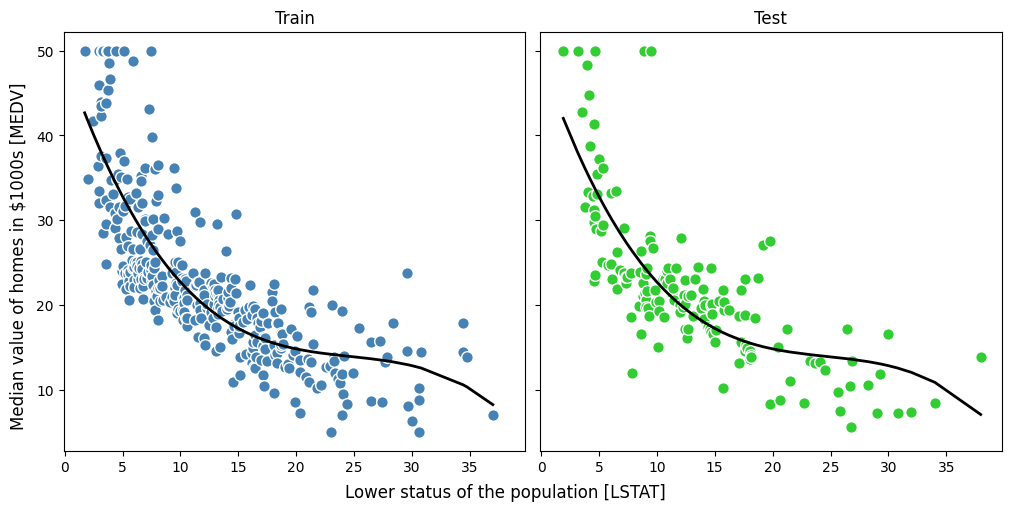

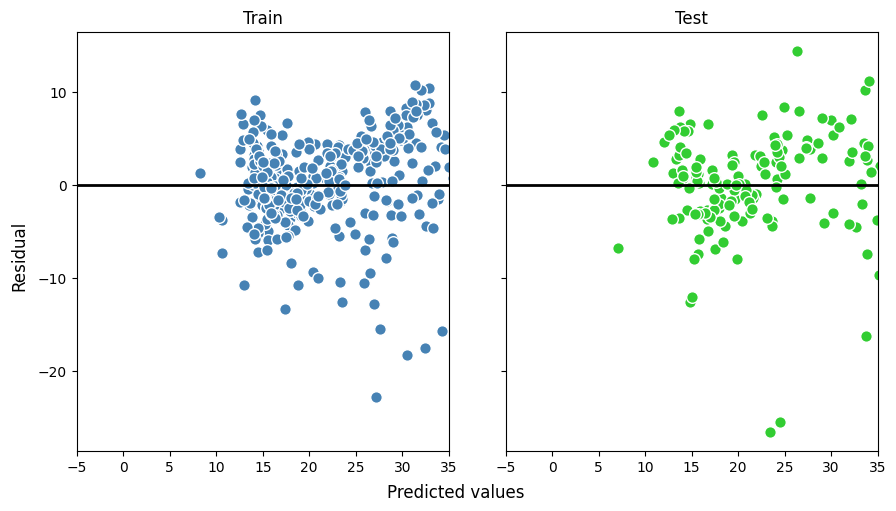

In [12]:
# Fit using linear regression
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# Predict
y_train_pred = lr.predict(X_train_poly)
y_test_pred = lr.predict(X_test_poly)

# Store results
results = []
store_results(
    results=results,
    model_name=f"Poly",
    model=lr,
    y_train=y_train,
    y_test=y_test,
    y_train_pred=y_train_pred,
    y_test_pred=y_test_pred,
    params=params,
)

# Plotting
plot_reg(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)
plot_res(y_train, y_test, y_train_pred, y_test_pred)

df = pd.DataFrame.from_records(results)
display(df)
